In [1]:
import numpy as np

In [375]:
n_population = 1_000_000#1_000_000
p_population = 0.01

In [376]:
all_banknotes = np.random.choice(
                    [0,1], 
                    p=[1-p_population, p_population],
                    size = n_population
                )

In [377]:
len(all_banknotes)

1000000

In [320]:
n = 10000

In [284]:
p_samples = []
for i in range(10_000):
    sample = np.random.choice(all_banknotes, size=n)
    k = sample.sum()
    p_sample = k/n
    p_samples.append(p_sample)

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

In [285]:
p_samples = np.array(p_samples)

In [286]:
p_samples.mean(), np.median(p_samples)

(0.0096948, 0.0097)

In [287]:
np.quantile?

In [288]:
p_samples.std(), (
    np.quantile(p_samples,0.75)-np.quantile(p_samples,0.25)
                                     )/2

(0.0009830996694130255, 0.0007000000000000001)

In [289]:
np.unique(p_samples, return_counts=True)

(array([0.0062, 0.0064, 0.0066, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
        0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
        0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
        0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
        0.0097, 0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104,
        0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112,
        0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012 ,
        0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126, 0.0127, 0.0128,
        0.0129, 0.013 , 0.0131, 0.0132, 0.0133, 0.0136]),
 array([  1,   1,   1,   5,   5,   9,   9,  19,  18,  18,  34,  49,  50,
         63,  66,  96, 111, 100, 161, 182, 203, 230, 238, 290, 305, 341,
        381, 363, 362, 392, 423, 393, 400, 376, 384, 383, 331, 349, 341,
        288, 278, 261, 233, 202, 192, 197, 153, 147, 113,  79,  66,  62,
         43,  36,  39,  28,  22,  18,  18,   8,   8,   7,   4,   5,   3,
 

In [290]:
from scipy.stats import binom, norm

In [291]:
binomial = binom(n, p_population)

In [292]:
x = np.arange(0,20)
y = binomial.pmf(x)

In [293]:
p_population, n

(0.01, 10000)

In [294]:
sns.histplot?

<AxesSubplot:ylabel='Probability'>

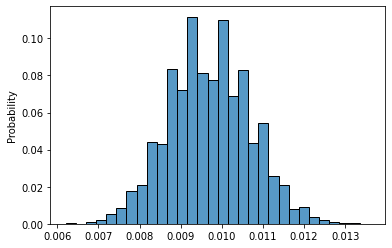

In [295]:
sns.histplot(p_samples, bins=30, stat='probability')

<AxesSubplot:>

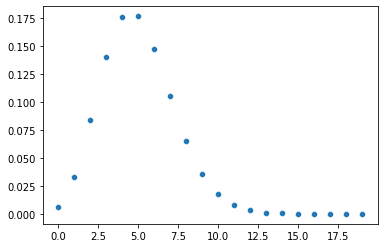

In [254]:
sns.scatterplot(x=x, y=y)

In [296]:
zz = np.linspace(-3.0,5.0,100)

In [297]:
yy = norm.pdf(zz)

In [298]:
p_norm = (p_samples - p_samples.mean())/p_samples.std()

Text(0.5, 0, 'score')

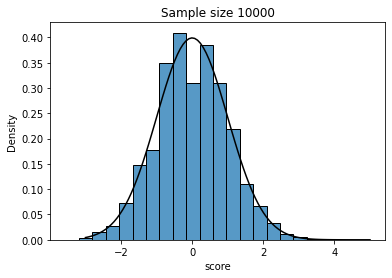

In [304]:
sns.histplot(p_norm, bins=20, stat='density')
sns.lineplot(x=zz, y=yy, color ='black')
plt.title(f"Sample size {n}")
plt.xlabel('score')

<table>
    <tr>
        <td><img src="sample500.png" width="200px"></td>
        <td><img src="sample1500.png" width="200px"></td>
        <td><img src="sample10000.png" width="200px"></td>
    </tr>
    <tr>
        <td>TBA</td>
        <td>TBA</td>
        <td>TBA</td>
    </tr>
</table>

In [378]:
p_guess = 0.015

In [379]:
n = 30000

In [380]:
sample = np.random.choice(all_banknotes, size=n)

In [381]:
k = sample.sum()
k

318

In [382]:
p_k = k/n
p_k

0.0106

In [383]:
binomial = binom(n, p_guess)

In [390]:
binomial.pmf(np.arange(k+1)).sum()

2.3310775472564332e-11

In [388]:
z = (p_k - p_guess)/(np.sqrt((p_guess*(1-p_guess))/n))
z

-6.269740398936047

In [389]:
norm.cdf(z)

1.8082527165921128e-10

<hr>

In [350]:
from scipy.stats import t

In [357]:
tt = t.pdf(zz, 5)
tt2 = t.pdf(zz, 2)
tt20 = t.pdf(zz, 20)
tt30 = t.pdf(zz, 30)
tt40 = t.pdf(zz, 40)

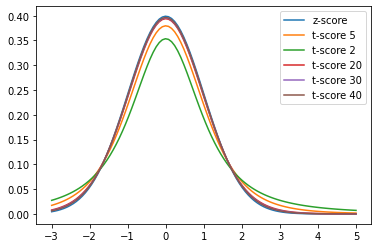

In [359]:
sns.lineplot(x=zz, y=yy)
sns.lineplot(x=zz, y=tt)
for v in [tt2, tt20, tt30, tt40]:
    sns.lineplot(x=zz, y=v)
plt.legend(['z-score','t-score 5','t-score 2','t-score 20','t-score 30','t-score 40'])

In [364]:
t.ppf(0.025, 3)

-3.1824463052842638

In [369]:
t.cdf(-1.5, 3)

0.11529193262241141